In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curves(lists, labels, title, x_label, y_label):
    # lists: a list of lists (or arrays) to plot
    # labels: a list of labels for each curve
    # title: the title of the plot
    # x_label: the label for the x-axis
    # y_label: the label for the y-axis
    
    if len(lists) != len(labels):
        raise ValueError("Number of lists and labels should be the same.")
    
    for i in range(len(lists)):
        plt.plot(lists[i], label=labels[i])

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

def plot(index, lst, title, x, y, start_idx):
    r1 = lst[0][index][start_idx:]
    r2 = lst[1][index][start_idx:]
    r3 = lst[2][index][start_idx:]
    r4 = lst[3][index][start_idx:]

    lists_to_plot = [r1, r2, r3, r4]
    legend_labels = ['LDA', 'SLDA', 'ETM', 'no topic'] 
    plot_curves(lists_to_plot, legend_labels, title, x, y)



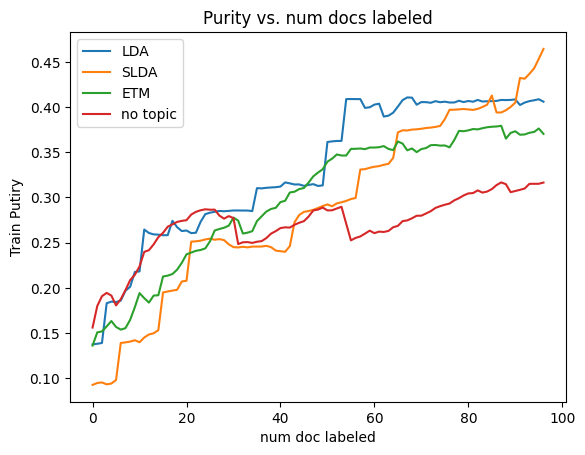

In [18]:
import numpy as np
 
lists = np.load('./model_testing_results/13_topics_3000_no_concat.npy')
plot(1, lists, 'Purity vs. num docs labeled', 'num doc labeled', 'Train Putiry', 1)

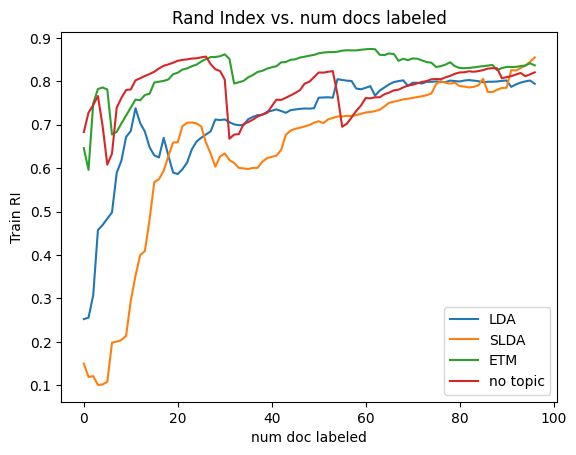

In [19]:
plot(2, lists, 'Rand Index vs. num docs labeled', 'num doc labeled', 'Train RI', 1)

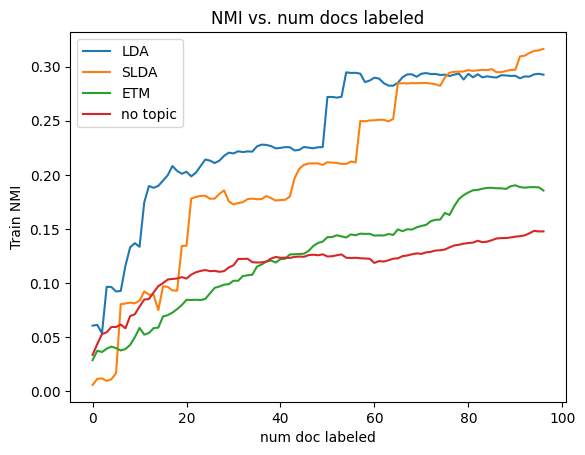

In [20]:
plot(3, lists, 'NMI vs. num docs labeled', 'num doc labeled', 'Train NMI', 1)

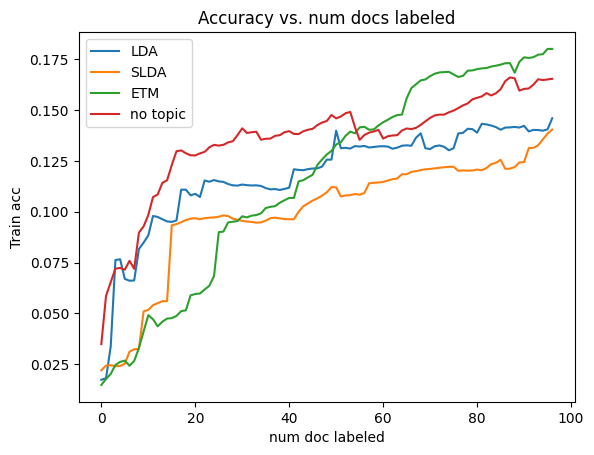

In [21]:
plot(0, lists, 'Accuracy vs. num docs labeled', 'num doc labeled', 'Train acc', 1)

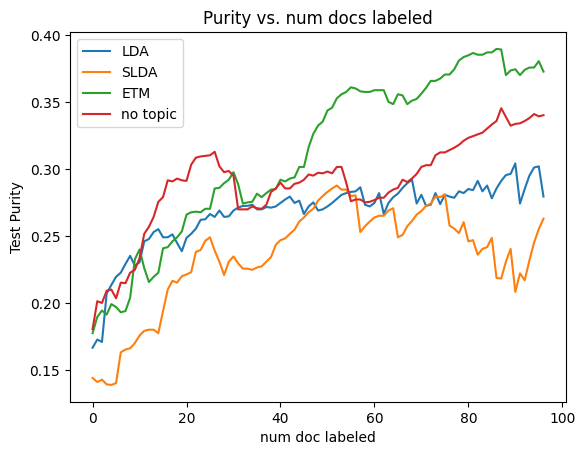

In [22]:
plot(5, lists, 'Purity vs. num docs labeled', 'num doc labeled', 'Test Purity', 1)

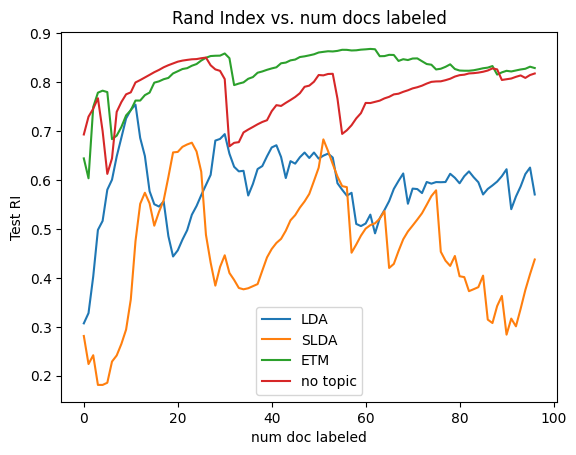

In [23]:
plot(6, lists, 'Rand Index vs. num docs labeled', 'num doc labeled', 'Test RI', 1)

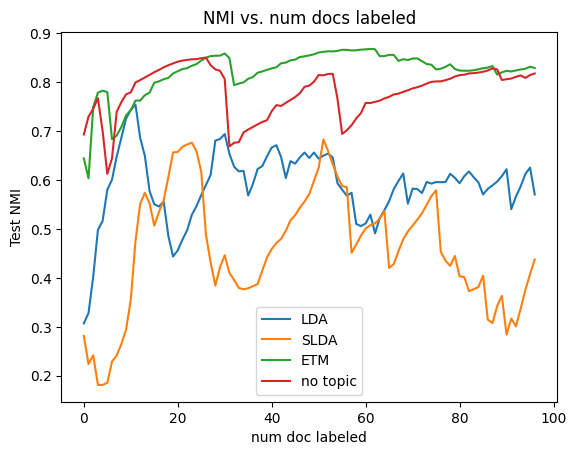

In [24]:
plot(6, lists, 'NMI vs. num docs labeled', 'num doc labeled', 'Test NMI', 1)